In [16]:
from scipy import io
import GPy
import numpy as np
import matplotlib.pyplot as plt
import pylab as pb
import GPy.inference.latent_function_inference.exact_gaussian_inference as eg

In [17]:
def plot_2outputs(m,xlim,x_1,x_2):
    fig = pb.figure(figsize=(12,8))
    #Output 1
    ax1 = fig.add_subplot(211)
    ax1.set_xlim(xlim)
    ax1.set_title('Output 1')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,0)],which_data_rows=slice(0,len(x_1)),ax=ax1)

    #Output 2
    ax2 = fig.add_subplot(212)
    ax2.set_xlim(xlim)
    ax2.set_title('Output 2')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,1)],which_data_rows=slice(len(x_1),len(x_1)+len(x_2)),ax=ax2)

In [18]:
def build_XY(input_list,output_list=None):
    num_outputs = len(input_list)
    Y = np.vstack(output_list)
    I = np.hstack( [np.repeat(j,_x.shape[0]) for _x,j in zip(input_list,range(num_outputs))] )
    X = np.vstack(input_list)
    X = np.hstack([X,I[:,None]])
    I = {'output_index':I[:,None]}
    return X,Y,I

In [19]:
mat_file1 = io.loadmat('2014_Dataset6.mat')
t_d1 = mat_file1['t']
p1_d1 = mat_file1['p1']
p2_d1 = mat_file1['p2']
t_d1 = t_d1*24

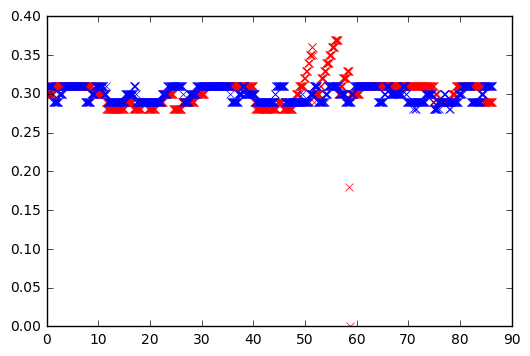

In [20]:
le = 288*3
x_d1 = np.arange(0,le/10,0.1)
x_d1 = np.reshape(x_d1,[len(x_d1),1])

start = 5912-288*1
p1_d1_test = p1_d1[start:start+le]
p2_d1_test = p2_d1[start:start+le]
y1_d1 = p1_d1_test
y2_d1 = p2_d1_test

#Training set
start_t = 5912+288*4
p1_d1_t = p1_d1[start_t:start_t+le]
p2_d1_t = p2_d1[start_t:start_t+le]
y1_d1_t = p1_d1_t
y2_d1_t = p2_d1_t

plt.plot(x_d1,y2_d1,'kx',color='red')
plt.plot(x_d1,y2_d1_t,'kx',color='blue')

plt.show()

In [21]:
K1 = GPy.kern.RBF(1)
K2 = GPy.kern.PeriodicExponential(1)

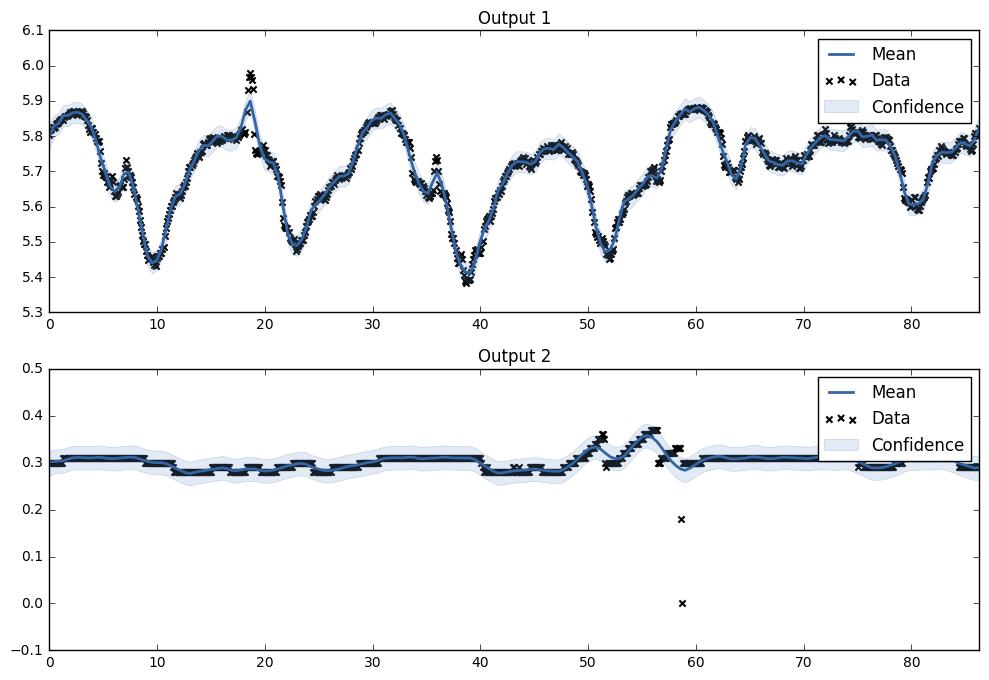

In [22]:
lcm1 = GPy.util.multioutput.LCM(input_dim=1,num_outputs=2,kernels_list=[K1,K2])
mul1 = GPy.models.GPCoregionalizedRegression([x_d1,x_d1],[y1_d1,y2_d1],kernel = lcm1)
# mul1['.*periodic_Matern32.period'].constrain_fixed(28.8)
mul1.optimize()
plot_2outputs(mul1, xlim=(0,x_d1[len(x_d1)-1]),x_1=x_d1,x_2=x_d1)
plt.show()

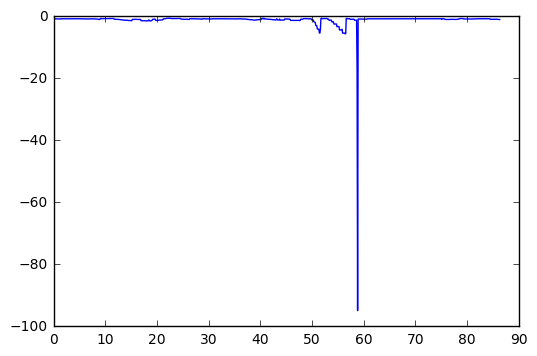

In [23]:
lkd1 = np.zeros(len(x_d1))
win = 1
for i in range(win, len(x_d1), 1):
    xi = [x_d1[i-win:i],x_d1[i-win:i]]
    yi = [y1_d1[i-win:i],y2_d1[i-win:i]]
    Xi, Yi, Ii = build_XY(xi, yi)
    p, lkd1[i], grad = eg.ExactGaussianInference.inference(mul1, mul1.kern, Xi, mul1.likelihood, Yi, Y_metadata = Ii)
plt.plot(x_d1[win:len(x_d1)],lkd1[win:len(x_d1)])
plt.show()

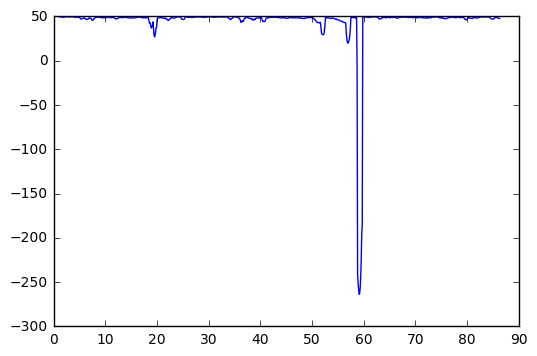

In [24]:
lkd1 = np.zeros(len(x_d1))
win = 10
for i in range(win, len(x_d1), 1):
    xi = [x_d1[i-win:i],x_d1[i-win:i]]
    yi = [y1_d1[i-win:i],y2_d1[i-win:i]]
    Xi, Yi, Ii = build_XY(xi, yi)
    p, lkd1[i], grad = eg.ExactGaussianInference.inference(mul1, mul1.kern, Xi, mul1.likelihood, Yi, Y_metadata = Ii)
plt.plot(x_d1[win:len(x_d1)],lkd1[win:len(x_d1)])
plt.show()

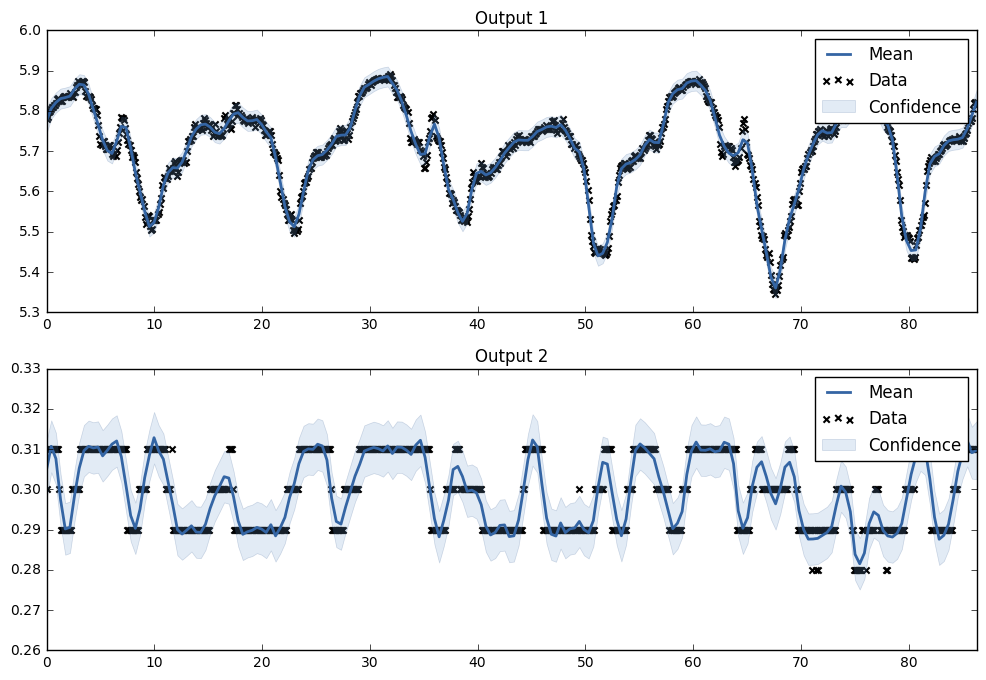

In [25]:
lcm1t = GPy.util.multioutput.LCM(input_dim=1,num_outputs=2,kernels_list=[K1,K2])
mul1t = GPy.models.GPCoregionalizedRegression([x_d1,x_d1],[y1_d1_t,y2_d1_t],kernel = lcm1t)
# mul1['.*periodic_Matern32.period'].constrain_fixed(28.8)
mul1t.optimize()
plot_2outputs(mul1t, xlim=(0,x_d1[len(x_d1)-1]),x_1=x_d1,x_2=x_d1)
plt.show()

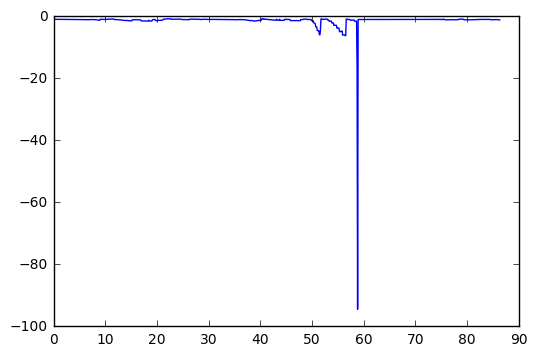

In [26]:
lkd1t = np.zeros(len(x_d1))
win = 1
for i in range(win, len(x_d1), 1):
    xi = [x_d1[i-win:i],x_d1[i-win:i]]
    yi = [y1_d1[i-win:i],y2_d1[i-win:i]]
    Xi, Yi, Ii = build_XY(xi, yi)
    p, lkd1t[i], grad = eg.ExactGaussianInference.inference(mul1t, mul1t.kern, Xi, mul1t.likelihood, Yi, Y_metadata = Ii)
plt.plot(x_d1[win:len(x_d1)],lkd1t[win:len(x_d1)])
plt.show()

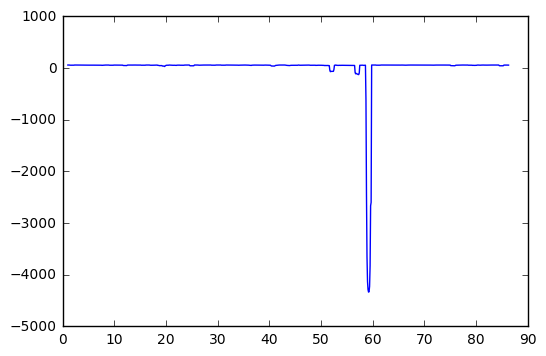

In [27]:
lkd1t = np.zeros(len(x_d1))
win = 10
for i in range(win, len(x_d1), 1):
    xi = [x_d1[i-win:i],x_d1[i-win:i]]
    yi = [y1_d1[i-win:i],y2_d1[i-win:i]]
    Xi, Yi, Ii = build_XY(xi, yi)
    p, lkd1t[i], grad = eg.ExactGaussianInference.inference(mul1t, mul1t.kern, Xi, mul1t.likelihood, Yi, Y_metadata = Ii)
plt.plot(x_d1[win:len(x_d1)],lkd1t[win:len(x_d1)])
plt.show()